# ASTR 310 Lecture 24 - Fitting

### Exercise 1: fitting supernova light curves  

Download the file “sn00fa_ubvri.snphot.dat” from the course web site. It is a text table containing UBVRI light curve data (magnitude vs. time) for the Type Ia supernova SN2000fa from [Jha et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006AJ....131..527J/abstract).  

1. Read in the table using your method of choice (e.g. `numpy.genfromtxt` or `astropy.io.ascii.read`). For this exercise we want the columns HJD, R (R magnitude) and Rerr (its uncertainty).


2. Select Julian dates (“HJD”) between 2451900 and 2451990.


3. Using `scipy.stats.linregress`, fit a line to the R magnitude as a function of Julian date. Hint: the fitted intercepts will be much more reliable & numerically stable if you subtract the mean date before fitting.  Report the slope and its uncertainty (with units!).

[5 pts]

In [10]:
import numpy as np
import astropy.io.ascii

table = astropy.io.ascii.read("sn00fa.ubvri.snphot.txt")
table = table[["HJD", "R", "+/-_3"]]
table = table[(table["HJD"] > 2451900) & (table["HJD"] < 2451990)]
table

HJD,R,+/-_3
float64,float64,float64
2451901.83,16.155,0.011
2451906.82,16.531,0.012
2451907.74,16.56,0.01
2451929.83,17.246,0.019
2451933.83,17.472,0.021
2451953.73,18.167,0.03
2451959.61,18.372,0.043
2451963.76,18.537,0.027


In [33]:
from scipy.stats import linregress

table["HJD"] = table["HJD"] - np.mean(table["HJD"])

r = linregress(table["HJD"], table["R"])

print(f"Slope is {r.slope} +/- {r.stderr} mag")

Slope is 0.036480123756479674 +/- 0.001035994784186247 mag


4. Plot the R-band flux versus time as points and the fit line with a solid line. 


5. Illustrate the uncertainty in the fit parameters as follows: draw 500 random values for the slope and intercept of the line. These values should be drawn from normal (Gaussian) distributions with means and standard deviations given by the fit parameters and their uncertainties. Construct 500 new lines from these samples and plot them on your figure.

[5 pts]


Text(0.5, 1.0, 'SN200fa decay')

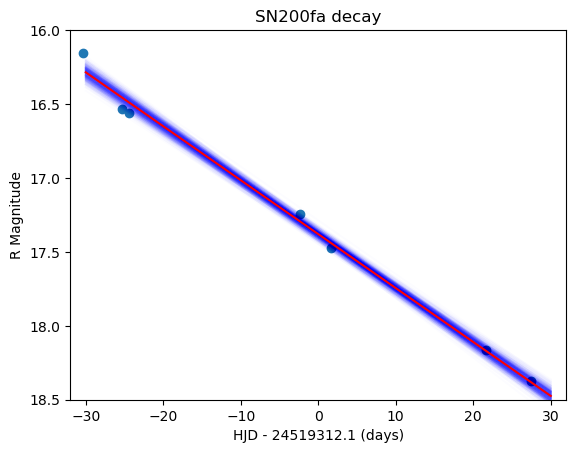

In [56]:
import matplotlib.pyplot as plt

plt.scatter(table['HJD'], table['R'])
x = np.linspace(-30, 30, 100)
y = r.slope * x + r.intercept

m = np.random.normal(loc=r.slope, scale=r.stderr, size=500)
b = np.random.normal(loc=r.intercept, scale=r.intercept_stderr, size=500)

for i in range(len(m)):
    y2 = m[i] * x + b[i]
    plt.plot(x, y2, color='b', alpha=0.01)

plt.plot(x, y, color='r')

plt.ylim(18.5, 16)
plt.xlim(-32, 32)
plt.xlabel("HJD - 24519312.1 (days)")
plt.ylabel("R Magnitude")
plt.title("SN200fa decay")

### Exercise 2: galaxy cluster X-ray surface brightness  

Download the file “abell1995_laroque2006.dat” from the course web site. This file contains the X-ray surface brightness profile of the cluster Abell 1995 as derived from Chandra X-ray observations in [LaRoque et al. 2006, 652, 917](https://ui.adsabs.harvard.edu/abs/2006ApJ...652..917L/abstract).  

1. Read the radius, surface brightness, and surface brightness error from this file using your favorite text file reader.  




2. Fit the “isothermal beta model” profile to these data:

$$
S_X(r) = S_{X0} \left[1 + \left(\frac{r}{r_c}\right)^2\right]^{(1-6\beta)/2}
$$

Here $S_{X0}$, $r_c$, and $\beta$ are the fitting parameters. Report your best-fit values and the error in each parameter. How do your results compare to LaRoque et al.? (They found $r_c \approx 235$ kpc and $\beta \approx 0.921$.) You need starting guesses; try $S_{X0} = 10^{-3}$ cts/s/arcmin$^2$, $r_c = 20$ kpc, and $\beta = 0.5$.

[5 pts]

In [86]:
from scipy.optimize import curve_fit

t = astropy.io.ascii.read("abell1995_laroque2006.txt")

def func(r, sx0, rc, b):
    return sx0 * (1 + (r/rc)**2)**((1-(6*b))/2)

p0, cov = curve_fit(func, t['radius'], t['surf_brt'], [1e-3, 20, 0.5])

print(f"Rc = {p0[1]} kpc and beta = {p0[2]}")

Rc = 187.40288287708887 kpc and beta = 0.739064615877447


3. Plot the data and the best-fit curve. Illustrate the fit uncertainties with 500 additional curves drawn from the fit parameters, using the same techniques as for Exercise 1.

[5 pts]


Text(0.5, 1.0, 'Abell 1995 X-Ray Surface Brightness Profile')

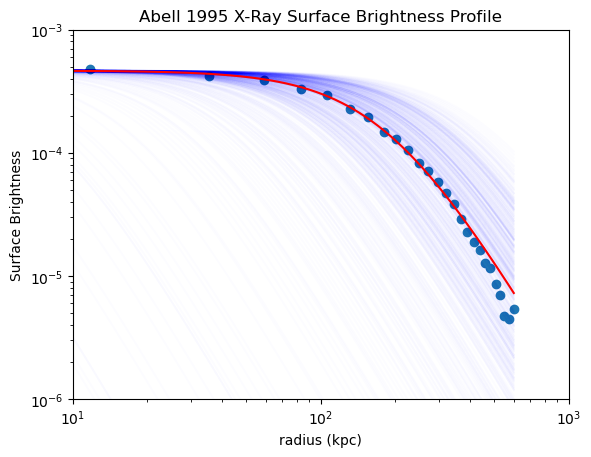

In [91]:
plt.scatter(t['radius'], t['surf_brt'])
x = np.linspace(0, 600, 500)
y = func(x, p0[0], p0[1], p0[2])

sx0 = np.random.normal(loc=p0[0], scale=cov[0,0], size=500)
rc = np.random.normal(loc=p0[1], scale=cov[1,1], size=500)
b = np.random.normal(loc=p0[2], scale=cov[2,2], size=500)

for i in range(500):
    y2 = func(x, sx0[i], rc[i], b[i])
    plt.plot(x, y2, color='b', alpha=0.01)

plt.plot(x, y, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1, 1e3)
plt.ylim(1e-6, 1e-3)
plt.xlabel("radius (kpc)")
plt.ylabel("Surface Brightness")
plt.title("Abell 1995 X-Ray Surface Brightness Profile")